# Use this to just create a list of the interpolated airfoil

In [47]:
import numpy as np
from scipy.interpolate import CubicSpline

def interpolate_airfoil(file_path):
    data = np.loadtxt(file_path, skiprows=1)
    x = data[:, 0]
    y = data[:, 1]

    # Find index of leading edge (minimum x) to split data correctly
    leading_edge_index = np.argmin(x)
    
    # Prepare the first and second halves
    x1, y1 = x[:leading_edge_index+1][::-1], y[:leading_edge_index+1][::-1]
    x2, y2 = x[leading_edge_index:], y[leading_edge_index:]

    x_new1 = np.linspace(x1.min(), x1.max(), 100)
    x_new2 = np.linspace(x2.min(), x2.max(), 100)

    # Create cubic splines and interpolate
    cs1 = CubicSpline(x1, y1)
    cs2 = CubicSpline(x2, y2)

    y_new1 = cs1(x_new1)
    y_new2 = cs2(x_new2)

    # Correctly combine the two halves: Ensure continuity and correct sequence
    x_new_combined = np.concatenate([x_new1[:-1], x_new2])  # Avoid duplicating the leading edge
    y_new_combined = np.concatenate([y_new1[:-1], y_new2])

    interpolated_data = np.column_stack((x_new_combined, y_new_combined))
    original_data = np.column_stack((x, y))

    return interpolated_data, original_data


# Use this to interpolate and save the airfoil to a new .dat file

In [2]:
import os
import numpy as np
from scipy.interpolate import CubicSpline

def interpolate_airfoil(file_path):
    # Load the data, skipping the airfoil name
    data = np.loadtxt(file_path, skiprows=1)
    
    # Extracting airfoil name from file path
    airfoil_name = os.path.basename(file_path).replace('.dat', '')
    
    x = data[:, 0]
    y = data[:, 1]

    # Interpolating as before
    leading_edge_index = np.argmin(x)
    x1, y1 = x[:leading_edge_index+1][::-1], y[:leading_edge_index+1][::-1]
    x2, y2 = x[leading_edge_index:], y[leading_edge_index:]

    x_new1 = np.linspace(x1.min(), x1.max(), 100)
    x_new2 = np.linspace(x2.min(), x2.max(), 100)

    cs1 = CubicSpline(x1, y1)
    cs2 = CubicSpline(x2, y2)

    y_new1 = cs1(x_new1)
    y_new2 = cs2(x_new2)

    x_new_combined = np.concatenate([x_new1[:-1], x_new2])
    y_new_combined = np.concatenate([y_new1[:-1], y_new2])

    interpolated_data = np.column_stack((x_new_combined, y_new_combined))
    
    # Original data, for comparison or other purposes
    original_data = np.column_stack((x, y))

    # Creating the output path
    output_folder = 'cleaned_airfoils'
    os.makedirs(output_folder, exist_ok=True)
    output_file_path = os.path.join(output_folder, f"{airfoil_name}_clean.dat")
    
    # Saving the interpolated data
    np.savetxt(output_file_path, interpolated_data, fmt='%0.8f', header='', comments='')

    return interpolated_data, original_data, output_file_path

# Example usage
file_path = 'coord_seligFmt/2032c.dat'
interpolated_data, original_data, output_file_path = interpolate_airfoil(file_path)

print(f"Interpolated data saved to {output_file_path}")


Interpolated data saved to cleaned_airfoils/2032c_clean.dat


In [48]:
# function to plot the interpolated airfoil
def plot_interpolated_airfoil(interpolated_list, original_list):
    plt.scatter(original_list[:,0], original_list[:,1], s=.6, c='r')
    plt.scatter(interpolated_list[:,0], interpolated_list[:,1], s=.6, c='b')
    plt.axis('equal')
    plt.axis('off')
    plt.legend(['Original Airfoil', 'Interpolated Airfoil'])
    plt.show()

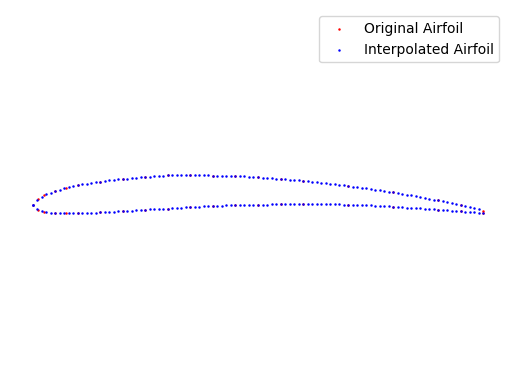

interpolated shape:  (201, 2)


In [49]:
a18_airfoil_interp, a18_airfoil_original = interpolate_airfoil("coord_seligFmt/a18.dat")
#plot_interpolated_airfoil(a18_airfoil)
plot_interpolated_airfoil(a18_airfoil_interp, a18_airfoil_original)
print("interpolated shape: ", a18_airfoil_interp.shape)

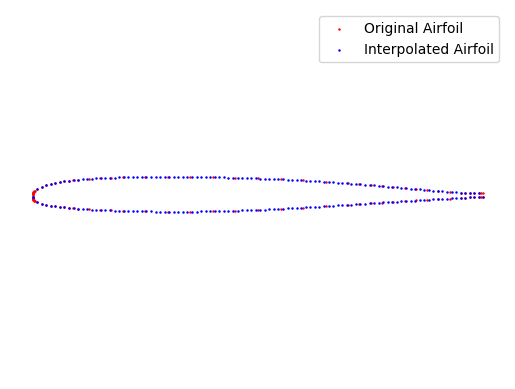

interpolated shape:  (199, 2)


In [46]:
a63a108c_airfoil_interp, a63a108c_airfoil = interpolate_airfoil("coord_seligFmt/a63a108c.dat")
plot_interpolated_airfoil(a63a108c_airfoil_interp,a63a108c_airfoil)
print("interpolated shape: ", a63a108c_airfoil_interp.shape)